In [17]:
# check if python >= 3.5
import sys
assert sys.version_info >= (3, 5)

# check if scikit-learn >= 0.20
import sklearn
assert sklearn.__version__ >= '0.20'

# common import
import numpy as np
import os

# set random seed
np.random.seed(42)

# plot pretty figure
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# where to save figure
project_root_dir = '.'
chapter_name = 'classification'
images_path = os.path.join(project_root_dir, 'images', chapter_name)
os.makedirs(images_path, exist_ok=True)

def save_fig(fig_id, 
             tight_layout=True, 
             fig_extension='png',
             fig_resolution=300
             ):
    
    fig_path = os.path.join(images_path, fig_id + '.' + fig_extension)
    
    print('saving figure', '\t:', fig_id)
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(fig_path, format=fig_extension, dpi=fig_resolution)

# MNIST

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [15]:
mnist_feature_names = mnist['feature_names']

cnt = 1
for feature in mnist_feature_names:
    print('feature', str(cnt),'\t:', feature)
    cnt += 1
    

feature 1 	: pixel1
feature 2 	: pixel2
feature 3 	: pixel3
feature 4 	: pixel4
feature 5 	: pixel5
feature 6 	: pixel6
feature 7 	: pixel7
feature 8 	: pixel8
feature 9 	: pixel9
feature 10 	: pixel10
feature 11 	: pixel11
feature 12 	: pixel12
feature 13 	: pixel13
feature 14 	: pixel14
feature 15 	: pixel15
feature 16 	: pixel16
feature 17 	: pixel17
feature 18 	: pixel18
feature 19 	: pixel19
feature 20 	: pixel20
feature 21 	: pixel21
feature 22 	: pixel22
feature 23 	: pixel23
feature 24 	: pixel24
feature 25 	: pixel25
feature 26 	: pixel26
feature 27 	: pixel27
feature 28 	: pixel28
feature 29 	: pixel29
feature 30 	: pixel30
feature 31 	: pixel31
feature 32 	: pixel32
feature 33 	: pixel33
feature 34 	: pixel34
feature 35 	: pixel35
feature 36 	: pixel36
feature 37 	: pixel37
feature 38 	: pixel38
feature 39 	: pixel39
feature 40 	: pixel40
feature 41 	: pixel41
feature 42 	: pixel42
feature 43 	: pixel43
feature 44 	: pixel44
feature 45 	: pixel45
feature 46 	: pixel46
featur

In [3]:
mnist_descr = mnist['DESCR']
print(mnist_descr)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [10]:
mnist_details = mnist['details']
#print(mnist_details)

for key, value in mnist_details.items():
    print(key, ':\n', value, '\n')
    

id :
 554 

name :
 mnist_784 

version :
 1 

format :
 ARFF 

upload_date :
 2014-09-29T03:28:38 

licence :
 Public 

url :
 https://www.openml.org/data/v1/download/52667/mnist_784.arff 

file_id :
 52667 

default_target_attribute :
 class 

tag :
 ['AzurePilot', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_41', 'study_99', 'vision'] 

visibility :
 public 

status :
 active 

processing_date :
 2018-10-03 21:23:30 

md5_checksum :
 0298d579eb1b86163de7723944c7e495 



In [12]:
mnist_categories = mnist['categories']
print(mnist_categories)


{}


In [13]:
mnist_url = mnist['url']
print(mnist_url)


https://www.openml.org/d/554


In [16]:
# read in the data & target
X, y = mnist['data'], mnist['target']

print('X shape', '\t:', X.shape)
print('y shape', '\t:', y.shape)

X shape 	: (70000, 784)
y shape 	: (70000,)


In [20]:
# plot one digit
import matplotlib as mpl
import matplotlib.pyplot as plt

# get the first row in 'data'
some_digit = X[0]
# reshape the row into a 2D array of 28 rows and 28 columns
some_digit_image = some_digit.reshape(28, 28)
print(some_digit_image)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

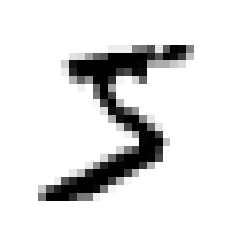

In [21]:
plt.imshow(some_digit_image,
           cmap='binary')
plt.axis('off')
plt.show()

In [24]:
# print the target value corresponding to X[0]
print('y[0] is:')
print(y[0])
print('which is ', type(y[0]))


y[0] is:
5
which is  <class 'str'>


In [26]:
# convert y into integer
y = y.astype(np.uint8)
print('after converting, y[0] is:')
print(y[0])
print('which is ', type(y[0]))


after converting, y[0] is:
5
which is  <class 'numpy.uint8'>


saving figure 	: the_first_200_digits


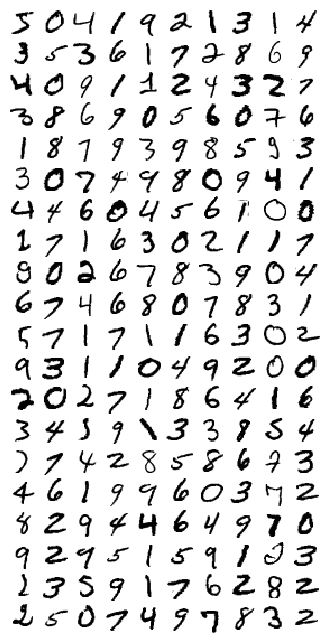

In [30]:
# function to plot digits

def plot_digits(instances, images_per_row=10, **options):
    image_size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(image_size, image_size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((image_size, image_size * n_empty)))
    
    for row in range(n_rows):
        r_images = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(r_images, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis('off')

# plot digits 

plt.figure(figsize=(9,9))

# get the first 200 rows (digits) from X
example_images = X[:200]

plot_digits(example_images, images_per_row=10)
save_fig('the_first_200_digits')
plt.show()